In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from datetime import datetime
import networkx as nx
import math
from collections import Counter, OrderedDict

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("/content/gdrive/My Drive/tweetsConvereted2017_toxicPerspectiveScore.csv")

In [4]:
df["week"] = df["NewDateFormat"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").strftime("%U"))
# df["month"] = df["NewDateFormat"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").strftime("%m"))
# df["day"] = df["NewDateFormat"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").strftime("%d"))

In [5]:
G = nx.read_edgelist('/content/gdrive/My Drive/users.edgelist')

In [53]:
groupDf = df[['user_id', 'Toxicity','week']]

In [54]:
groupDf2 = groupDf[['user_id', 'Toxicity','week']].astype({'user_id': str, 'week': str})

In [55]:
# weekDf = groupDf2[groupDf2['week']=="01"]

In [56]:
groupedDf = groupDf2.groupby(['user_id']).agg({'Toxicity': 'mean'}).reset_index()
# groupedDf = weekDf.groupby(['user_id']).agg({'Toxicity': 'mean'}).reset_index()

In [57]:
users_list = list(groupedDf['user_id'].unique().astype(str))

In [58]:
G2 = G.subgraph(users_list)

In [59]:
user_toxicity = groupedDf.set_index('user_id')['Toxicity'].to_dict()

In [60]:
neighbor_toxicity = {}
for user in G2.nodes():
  neighbors = list(G2.neighbors(user))
  if user in neighbors:
      neighbors.remove(user)
  if len(neighbors) > 0:
      neighbor_toxicity[user] = groupedDf[groupedDf['user_id'].isin(neighbors)]['Toxicity'].mean()

In [61]:
x = [user_toxicity[user] for user in neighbor_toxicity.keys()]
y = list(neighbor_toxicity.values())

In [62]:
diff = [x[i] - y[i] for i in range(len(x))]

In [63]:
diff = [elem * 10 for elem in diff]

In [64]:
diff = [math.ceil(elem) if elem >= 0 else math.floor(elem) for elem in diff]

In [65]:
diff = [elem / 10 for elem in diff]

In [66]:
len(diff)

59837

In [67]:
diff_counts = Counter(diff)

In [68]:
sum(diff_counts.values())

59837

In [72]:
diff_counts

Counter({0.1: 20331,
         -0.1: 36070,
         0.2: 2137,
         0.3: 289,
         -0.2: 918,
         0.4: 52,
         0.5: 6,
         0.7: 3,
         0.6: 5,
         -0.3: 21,
         0.8: 1,
         -0.4: 4})

In [77]:
sorted_counts = OrderedDict(sorted(diff_counts.items()))

In [78]:
sorted_counts

OrderedDict([(-0.4, 4),
             (-0.3, 21),
             (-0.2, 918),
             (-0.1, 36070),
             (0.1, 20331),
             (0.2, 2137),
             (0.3, 289),
             (0.4, 52),
             (0.5, 6),
             (0.6, 5),
             (0.7, 3),
             (0.8, 1)])

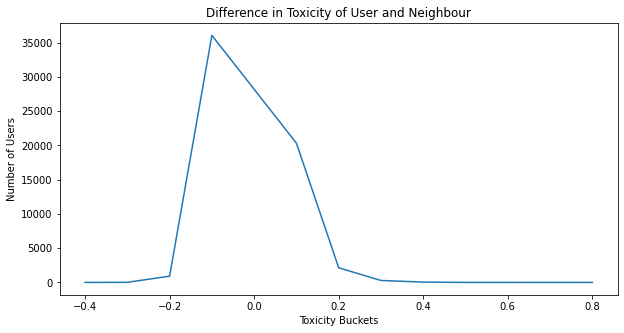

In [82]:
values = list(sorted_counts.keys())
counts = list(sorted_counts.values())

plt.figure(figsize=(10,5))
plt.plot(values, counts)
# plt.scatter(values, counts)
plt.xlabel('Toxicity Buckets')
plt.ylabel('Number of Users')
plt.title('Difference in Toxicity of User and Neighbour')

# plt.xticks(range(len(values)), values)
plt.show()

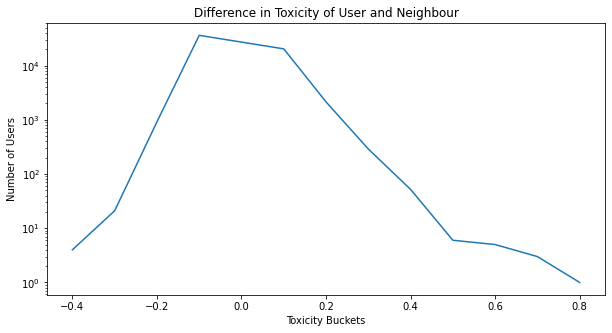

In [85]:
plt.figure(figsize=(10,5))
plt.semilogy(values, counts)
# plt.scatter(values, counts)
plt.xlabel('Toxicity Buckets')
plt.ylabel('Number of Users')
plt.title('Difference in Toxicity of User and Neighbour')

# plt.xticks(range(len(values)), values)
plt.show()